# Project: IMDB Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

IMDB Dataset was chosen for this project. It has several attributes from director names to adjusted budget and revenue for each movie from 1960 to 2015. The objective of the study was to investigate the highest grossing movie genres, and to explore more detailed information from the highest grossing movie genre.
In order to start the analysis, first I need to import required libraries and packages such as pandas, numpy, and matplotlib.pyplot to run our analysis. In order to plot visualiations inline with notebook I type %matplotlib inline in the code cell below.

In [65]:
# import libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

I load my data and print out a few lines of the dataset in order to obtain better understanding of it.

In [66]:
# read and explore dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Data types and more info to explore the number of null values

In [48]:
# more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

There is no missing data in our numerical attributes so there is no need to use fill in the missing values.

Number of unique values in each column

In [49]:
# number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

To explore descriptive stats for some columns

In [50]:
# descriptive stats
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

check for duplicated values and drop them if there is any

In [67]:
# duplicated rows
sum(df.duplicated())

1

Drop duplicated rows

In [68]:
# drop duplicated row
df.drop_duplicates(inplace=True)

Rechecking the duplicated values (observations)

In [69]:
# check if duplicated row is still in dataset
sum(df.duplicated())

0

Checking columns names

In [51]:
# check column names for quality and structure
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

The column names are fine and no need to rename. All are consistent and there is no space within names.
The data types except release_date are also checked and are fine.

Change release_date data type from string to datetime and recheck release-date for its data type.

In [70]:
# change release date to date/time data type
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

<a id='eda'></a>
## Exploratory Data Analysis

### Which movie genres have had the highest total revenue since 1960?

Total revenue grouped by movie genres and sorted descending

In [6]:
# Total revenue grouped by movie genres and sorted descending
x = df.groupby('genres', sort=False)["revenue_adj"].sum().reset_index(name='total_revenue')
df_genre = x.sort_values('total_revenue',ascending=False)
#df_genre

Select top 5 genres with highest revenue

In [7]:
# top 5 highest revenue genres
df_genre5 = df_genre.head(5)
df_genre5

,genres,total_revenue
25,Comedy,2.485195e+10
49,Drama,2.090257e+10
179,Comedy|Romance,1.453401e+10
451,Adventure|Action|Thriller,1.088981e+10
108,Comedy|Drama|Romance,1.057819e+10


Draw bar chart for top 5 genres

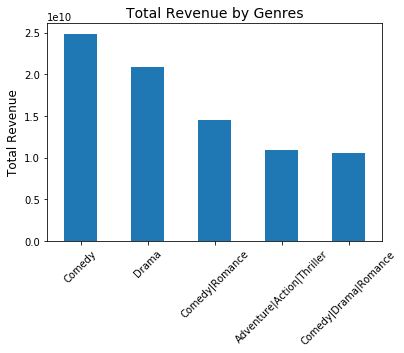

In [54]:
# draw bar chart
ax=df_genre5.plot(kind='bar',figsize=(6,4),legend=False)
ax.set_xticklabels(df_genre5.genres, rotation=45, fontsize=10)
ax.set_title("Total Revenue by Genres",fontsize=14)
ax.set_ylabel("Total Revenue",fontsize=12);

Comedy genre has sold the most which is followed by Drama, Comedy/Romance, Adventure/Action/Thriller, Comedy/Drama/Romance genres. Each the aforementioned genres have sold more than 10 billion dollars.

### Which rating has the highest number of movies in comdey genre?

Draw histogram of rating distribution to explore the number of movies belonging to each rate bin

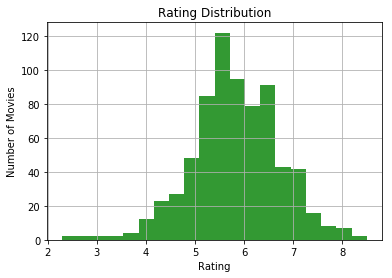

In [97]:
# draw histogram of rating distribution to explore the number of movies belonging to each rate bin
df_comedy = df.query('genres == "Comedy"')
df_vote = df_comedy['vote_average'].plot(kind='hist',bins=20, color='g',grid=True, alpha=0.8)
df_vote.set_xlabel("Rating")
df_vote.set_ylabel("Number of Movies")
df_vote.set_title("Rating Distribution");

The highest number of movies in comedy genre is from rating bin of [5,6].

### Has annual average rating increased from 1960 to 2015 in comedy genre?

Ratings are first grouped by production year and their mean is calculated in each year. The scatter plot between rating average and release year is drawn.

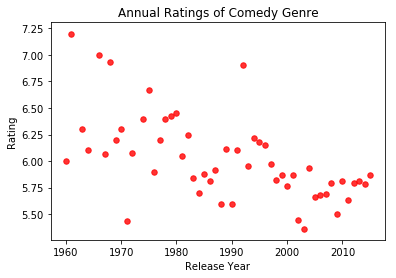

In [94]:
# scatter plot of rating average vs release year
df_mean = df_comedy.groupby('release_year')['vote_average'].mean().reset_index(name='average_vote')
df_mean

plt.scatter(df_mean['release_year'], df_mean['average_vote'], s=30, c='r', alpha=0.8)
plt.title("Annual Ratings of Comedy Genre")
plt.xlabel("Release Year")
plt.ylabel("Rating");

Annual average rating of comedy genre has been reduced from 1960 to 2015.

### The annual average rating of comedy movies has declined from 1960 to 2015. One year in 60s has the highest vote. Which year is it? Which directors are from this year?

Select the top year in terms of average rating

In [74]:
# top year in terms of average rating
df_1960s = df_mean.query('average_vote > 7.00')
df_1960s

,release_year,average_vote
1,1961,7.2


Inquiry of movie titles in 1961

In [78]:
# movie titles in 1961
df_1961 = df_comedy.query('release_year == 1961')['original_title'].unique()
df_1961

array(['The Ladies Man'], dtype=object)

Inquiry of director name

In [98]:
# director name for The Ladies Man movie
df_1961d = df_comedy.query('release_year == 1961')['director'].unique()
df_1961d

array(['Jerry Lewis'], dtype=object)

The highest rating comedy movie is from 1961 with the name of The Ladies Man from Jerry Lewis.

<a id='conclusions'></a>
## Conclusions

The highest grossing movie genre from 1960 to 2015 is comedy. It has sold around 25 billion dollars cumulatively. The other highest grossing genres are drama, comedy/romance, adventure/action/thriller, and comedy/drama/romance that each has sold more than 10 billion dollars. Comedy genre has a normal rating distribution with regards to the number of movies which is slightly skewed to the left. The highest number of movies are from rating bin of [5,6]. The lowest number of movies are both highest and lowest rated. The annual average rating of comedy movies has sligtly declined over time. This doesn't mean any causation but a negative correlation between release year and annual average rate. The highest rating comedy movie is from 1961 with the name of The Ladies Man from Jerry Lewis.